In [1]:
import pandas as pd
import matplotlib
from pandas.plotting import scatter_matrix
%matplotlib inline

In [2]:
recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[0])
recent_grads.describe()

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [3]:
raw_data_count = recent_grads.shape[0]
recent_grads = recent_grads.dropna(axis=0)
clean_data_count = recent_grads.shape[0]
print(raw_data_count)
print(clean_data_count)

173
172


### Exploring the data on recent college graduates

write up an introduction
For what timeframe? What exactly do the columns stand for? What is the source? Overview of questions we want to ask

Data has been cleaned up so that there are no empty fields in the dataset - 1 major has been dropped for that reason, bringing the total number of majors down to 172.

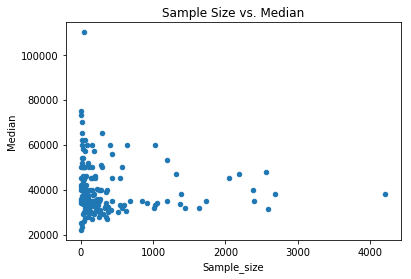

In [4]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Sample Size vs. Median')

No real correlation

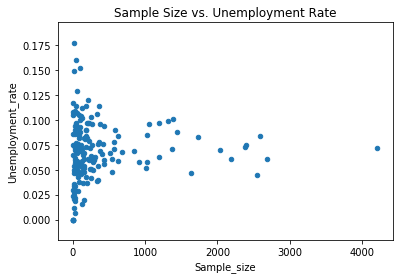

In [5]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Sample Size vs. Unemployment Rate')

No real correlation

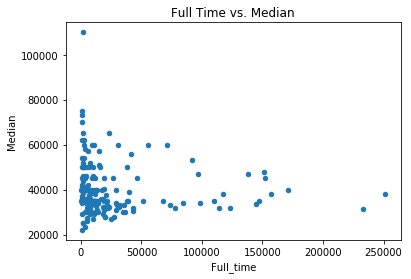

In [6]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Full Time vs. Median')

No real correlation

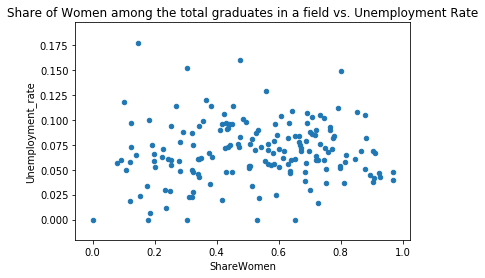

In [7]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='Share of women among the total graduates in a field vs. Unemployment Rate')

No correlation at all, not even a weak one

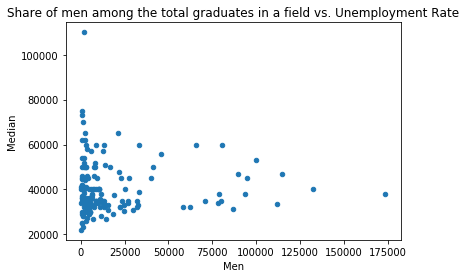

In [8]:
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Total number of male graduates in a field vs. Unemployment Rate')

No real correlation

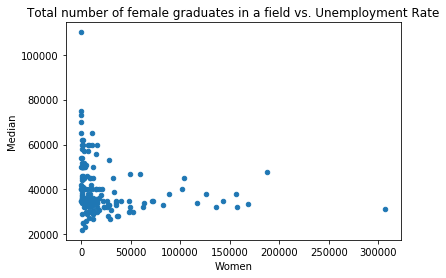

In [9]:
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Total number of female graduates in a field vs. Unemployment Rate')

No real correlation

### Summarizing the scatter plots

write up the summary

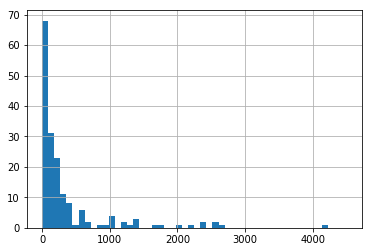

In [10]:
recent_grads['Sample_size'].hist(bins=50, range=(0, 4500))

Histogram of sample sizes in the dataset. The majority of majors seemed to have less than 1000 graduates. Let's take a closer look at that area of the histogram.

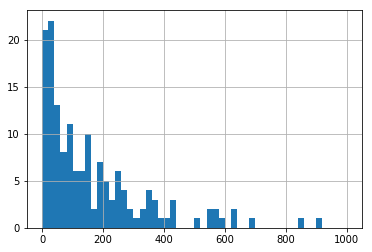

In [11]:
recent_grads['Sample_size'].hist(bins=50, range=(0, 1000))

Again, most majors seem to have less than 500 graduates in our dataset.

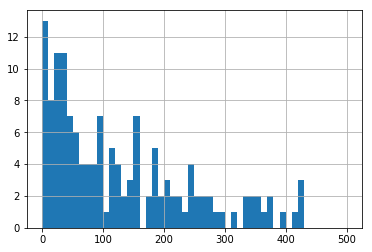

In [12]:
recent_grads['Sample_size'].hist(bins=50, range=(0, 500))

In this histogram, every bar represent a bin of 10. 13 majors have 10 or less graduates, 8 have between 10 and 20 and so on. The majority of majors represented in this dataset is rather small, making statistically relevant findings impossible.

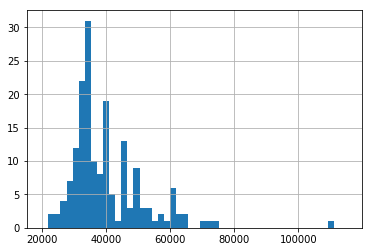

In [13]:
recent_grads['Median'].hist(bins=50, range=(20000, 115000))

The majority of majors seems to have a median income of around 30,000\$, with one extreme outlier at 110,000\$. No entries were below 20,000\$ yearly income.

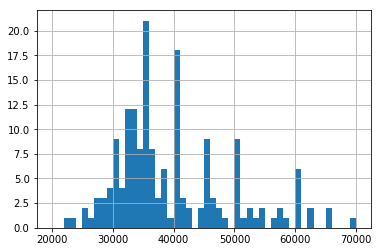

In [14]:
recent_grads['Median'].hist(bins=50, range=(20000, 70000))

A closer look at the range between 20,000\$ and 70,000\$ median income. This time each bin represents a step of 1,000\$.

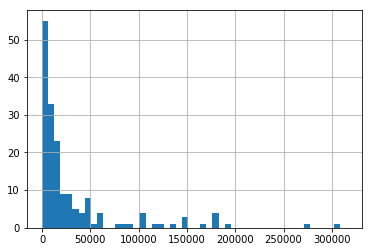

In [15]:
recent_grads['Employed'].hist(bins=50, range=(0, 315000))

What exactly does the "Employed"-column stand for? Can't be how many of the recent graduates form this dataset are already employed, since the maximum sample size was below 4,500, while the maximum in the "Employed"-column is above 300,000. Might be total number of employed people in that field.

Cutting out outliers north of 250,000:

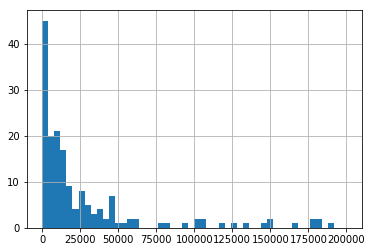

In [16]:
recent_grads['Employed'].hist(bins=50, range=(0, 200000))

Still more than 50% are in the lowest quartile.

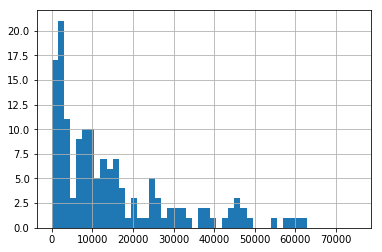

In [17]:
recent_grads['Employed'].hist(bins=50, range=(0, 75000))

Looking at the data between 0 and 75,000

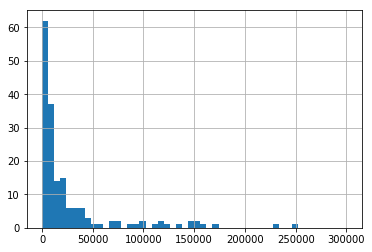

In [18]:
recent_grads['Full_time'].hist(bins=50, range=(0, 300000))

The "Full-Time"-column has the same problem as the "Employment"-column.

Also cutting out two outlier above 175,000:

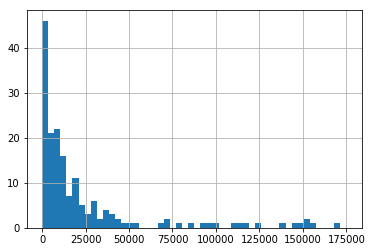

In [20]:
recent_grads['Full_time'].hist(bins=50, range=(0, 175000))

Again, most of the values are below 75,000.

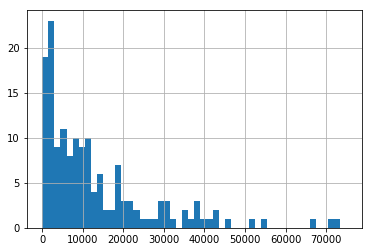

In [21]:
recent_grads['Full_time'].hist(bins=50, range=(0, 75000))

Looking at the range between 0 and 75,000.

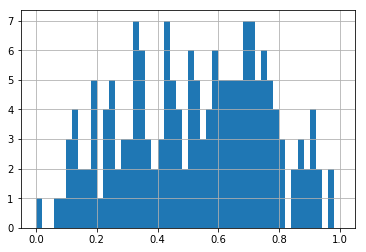

In [22]:
recent_grads['ShareWomen'].hist(bins=50, range=(0, 1))

The share of women for each major, with 0 being 0% and 1 being 100%. The numbers show a slight imbalance towards women - apparently there are more majors with 50% women and up than with less than 50% women.

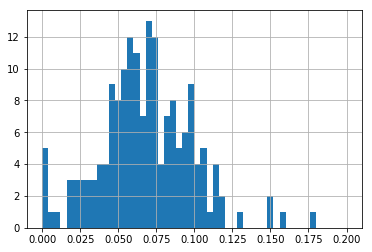

In [23]:
recent_grads['Unemployment_rate'].hist(bins=50, range=(0, 0.2))

The unemployment rate for each major. It would be interesting to compare this with the general unemployment rate over the same timeframe, to see how those numbers hold up against the general job market trends, unless this data is the general data for the whole field and not for the recent graduates alone.

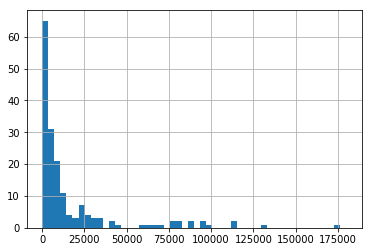

In [24]:
recent_grads['Men'].hist(bins=50, range=(0, 180000))

The absolute numbers of men in each major.

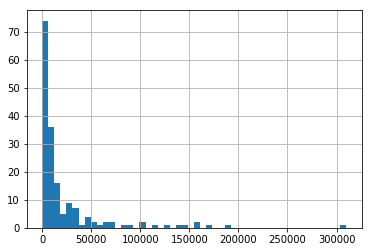

In [25]:
recent_grads['Women'].hist(bins=50, range=(0, 310000))

The absolute numbers of women in each major.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002434DBF32B0>,
      dtype=object)

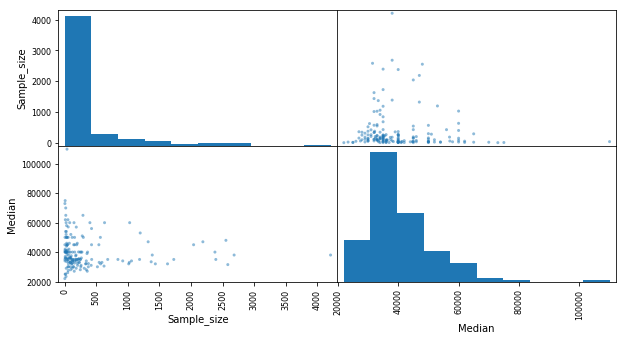

In [28]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10, 5))

The sample size seems to have no impact on the median.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002434E224DD8>,
      dtype=object)

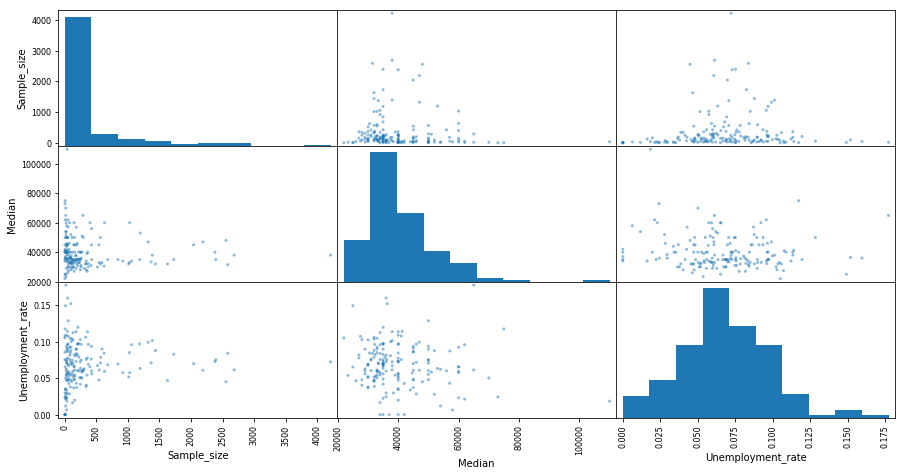

In [30]:
scatter_matrix(recent_grads[['Sample_size','Median', 'Unemployment_rate']], figsize=(15, 7.5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002434E57A588>,
      dtype=object)

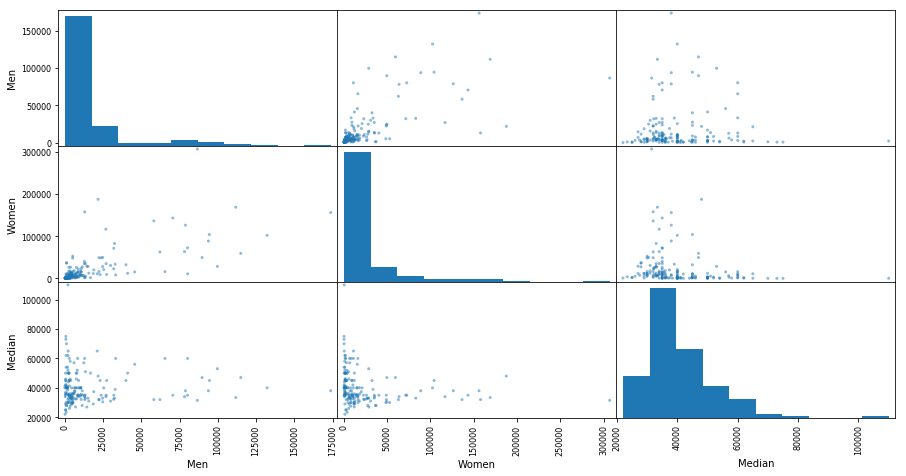

In [31]:
scatter_matrix(recent_grads[['Men', 'Women', 'Median']], figsize=(15, 7.5))

The relation between the numbers of men and women seem to have a weak positive correlation.

Comparing the plots of Median vs. Men and Median vs. Women, it seems as if among the higher-median majors the absolute numbers of men have a tendency to be higher.